## Loading the Data

In [5]:
import os, sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

def load_and_process_csv(file_path, index_col, prefix, rename_map=None):
    df = pd.read_csv(file_path)
    df['Status'] = prefix + df[index_col]
    df['Total Count'] = df['Total Count'].str.replace(',', '').str.replace(' ', '0').astype(float)
    pivot_df = df.pivot(index='Sch_Div', columns='Status', values='Total Count').reset_index()
    pivot_df.columns.name = None
    if rename_map:
        pivot_df.rename(columns=rename_map, inplace=True)
    return pivot_df

def load_and_process_percent_csv(file_path, index_col, prefix, rename_map):
    df = pd.read_csv(file_path)
    df[index_col] = prefix + df[index_col].astype(str)
    pivot_df = df.pivot(index='Sch_Div', columns=index_col, values='Degree_Percent').reset_index()
    pivot_df.columns.name = None
    desired_column_order = ['Bachelor\'s Degree', 'Master\'s Degree', 'Doctoral Degree']
    pivot_df = pivot_df[['Sch_Div'] + desired_column_order]
    pivot_df.rename(columns=rename_map, inplace=True)

    return pivot_df


def loadLocationData():
    location = pd.read_csv('School Addresses.csv')
    location = location[['Zip', 'Latitude', 'Longitude', 'Sch_div']]
    location = location.rename(columns={'Sch_div':'Sch_Div'})
    return location

def loadTeacherData():
    education_level = load_and_process_percent_csv(
        file_path='Education_Level.csv',
        index_col='Degree_Type',
        prefix='',
        rename_map={
            'Bachelor\'s Degree': 'bachelors_degree_percent',
            'Doctoral Degree': 'doctoral_degree_percent',
            'Master\'s Degree': 'masters_degree_percent',
        }
    )
    return education_level


def loadStudentBehaviorsData():
  absenteeism = pd.read_csv('Absenteeism.csv')
  absenteeism = absenteeism[['Chronic_Absenteeism_Rate', 'Sch_Div']]

  dropout = pd.read_csv('Dropout.csv')
  dropout = dropout[['Cohort_Dropout_Rate', 'Sch_Div']]
  student_behaviors = pd.merge(absenteeism, dropout, on='Sch_Div', how='left')
  return student_behaviors

def loadEconomicData():
  free_lunch = pd.read_csv('Free_and_Reduced_Lunch.csv')
  free_lunch = free_lunch[['Percent Eligible', 'Sch_Div']]
  free_lunch = free_lunch.rename(columns={'Percent Eligible': 'percent_eligible_for_lunch'})

  funding = pd.read_csv('Funding.csv')
  funding = funding[['Total_Per_Pupil_Expenditures', 'Total_Expenditures', 'Sch_Div']]


  economic = pd.merge(free_lunch, funding, on='Sch_Div', how='left')
  return economic


def loadTestingData():
  testing = pd.read_csv('SOL_Pass_Rate.csv')
  testing = testing[['SOL Pass Rate', 'Sch_Type', 'Sch_Div']]
  testing = testing.rename(columns={'SOL Pass Rate': 'sol_pass_rate'})
  return testing


def loadDemographicData():
    economically_disadvantaged = load_and_process_csv(
        'Economically_Disadvantaged.csv', 'Disadvantaged', 'Status_',
        {'Status_N': 'economically_disadvantaged_N', 'Status_Y': 'economically_disadvantaged_Y'}
    )

    english_learners = load_and_process_csv(
        'English_Learners.csv', 'English Learners', 'Status_',
        {'Status_N': 'english_learners_N', 'Status_Y': 'english_learners_Y'}
    )

    foster_care = load_and_process_csv(
        'Foster_Care.csv', 'Foster Care', 'Status_',
        {'Status_N': 'foster_care_N', 'Status_Y': 'foster_care_Y'}
    )

    gender = load_and_process_csv(
        'Gender.csv', 'Gender', 'Gender_',
        {'Gender_Male': 'gender_male', 'Gender_Female': 'gender_female', 'Gender_Other': 'gender_other'}
    )

    homeless = load_and_process_csv(
        'Homeless.csv', 'Homeless', 'Status_',
        {'Status_N': 'homeless_N', 'Status_Y': 'homeless_Y'}
    )

    military_connected = load_and_process_csv(
        'Military_Connected.csv', 'Military', 'Status_',
        {'Status_N': 'military_N', 'Status_Y': 'military_Y'}
    )

    race = pd.read_csv('Race.csv')
    column_names = ['Division', 'School', 'Race', 'Total Count', 'Percent', 'Sch_Div']
    race.columns = column_names
    race['Total Count'] = race['Total Count'].str.replace(',', '').str.replace(' ', '0').astype(float)
    race_pivot = race.pivot(index='Sch_Div', columns='Race', values='Total Count').reset_index()
    race_pivot.columns.name = None
    race = race_pivot.fillna(0)

    students_with_disabilities = load_and_process_csv(
        'Students_with_Disabilities.csv', 'Disabled', 'Status_',
        {'Status_N': 'disabled_N', 'Status_Y': 'disabled_Y'}
    )

    merged_data = economically_disadvantaged

    # List of all dataframes to be merged
    dataframes_to_merge = [
        english_learners, foster_care, gender, homeless,
        military_connected, race, students_with_disabilities
    ]

    # Merge all dataframes on 'Sch_Div'
    for df in dataframes_to_merge:
        merged_data = pd.merge(merged_data, df, on='Sch_Div', how='left')

    return merged_data

def loadAllData():
  demographic_data = loadDemographicData()
  testing_data = loadTestingData()
  economic_data = loadEconomicData()
  student_behaviors_data = loadStudentBehaviorsData()
  teacher_data = loadTeacherData()
  location_data = loadLocationData()

  master_data = pd.merge(demographic_data, testing_data, on='Sch_Div')
  master_data = pd.merge(master_data, economic_data, on='Sch_Div', how='left')
  master_data = pd.merge(master_data, student_behaviors_data, on='Sch_Div', how='left')
  master_data = pd.merge(master_data, teacher_data, on='Sch_Div', how='left')
  master_data = pd.merge(master_data, location_data, on='Sch_Div', how='left')

  return master_data

master = loadAllData()

Fontconfig warning: ignoring UTF-8: not a valid region tag
Matplotlib is building the font cache; this may take a moment.


FileNotFoundError: [Errno 2] No such file or directory: 'Economically_Disadvantaged.csv'

## Visualize the Data

In [ ]:
pd.set_option('display.max_columns', None)

# Basic info
print("Dataset size in MB",sys.getsizeof(master)/1e6)
print("Number of entries", len(master))
print("Number of features", len(master.columns))
print("\n")
print(master.info())
print(master.describe())
master.head(10)

Dataset size in MB 0.763191
Number of entries 1696
Number of features 36


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1696 entries, 0 to 1695
Data columns (total 36 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sch_Div                               1696 non-null   object 
 1   economically_disadvantaged_N          1682 non-null   float64
 2   economically_disadvantaged_Y          1692 non-null   float64
 3   english_learners_N                    1695 non-null   float64
 4   english_learners_Y                    1156 non-null   float64
 5   foster_care_N                         1696 non-null   float64
 6   foster_care_Y                         913 non-null    float64
 7   gender_female                         1696 non-null   float64
 8   gender_male                           1696 non-null   float64
 9   gender_other                          246 non-null    float64
 10  homeless_

,Sch_Div,economically_disadvantaged_N,economically_disadvantaged_Y,english_learners_N,english_learners_Y,foster_care_N,foster_care_Y,gender_female,gender_male,gender_other,homeless_N,homeless_Y,military_N,military_Y,American Indian or Alaska Native,Asian,"Black, not of Hispanic origin",Hispanic,Native Hawaiian or Pacific Islander,"Non-Hispanic, two or more races","White, not of Hispanic origin",disabled_N,disabled_Y,sol_pass_rate,Sch_Type,percent_eligible_for_lunch,Total_Per_Pupil_Expenditures,Total_Expenditures,Chronic_Absenteeism_Rate,Cohort_Dropout_Rate,bachelors_degree_percent,masters_degree_percent,doctoral_degree_percent,Zip,Latitude,Longitude
0,A. Henderson Elementary Prince William County ...,572.0,216.0,671.0,107.0,786.0,2.0,376.0,412.0,NaN,787.0,NaN,690.0,98.0,1.0,90.0,163.0,181.0,6.0,83.0,264.0,693.0,95.0,76.50,Elem,25.8,11831.0,9476229.0,10.81,NaN,35.0,62.0,2.0,22025.0,38.621549,-77.343909
1,A.G. Richardson Elementary Culpeper County Pub...,335.0,207.0,510.0,29.0,542.0,NaN,273.0,269.0,NaN,540.0,NaN,528.0,14.0,2.0,2.0,64.0,79.0,0.0,49.0,346.0,450.0,92.0,69.75,Elem,40.5,12529.0,6714834.0,27.36,NaN,44.0,56.0,0.0,22701.0,38.446930,-78.014278
2,A.M. Davis Elementary Chesterfield County Publ...,326.0,386.0,562.0,136.0,710.0,2.0,354.0,358.0,NaN,710.0,NaN,707.0,5.0,1.0,30.0,251.0,244.0,2.0,42.0,142.0,611.0,101.0,53.00,Elem,60.9,12147.0,8822645.0,19.85,NaN,31.0,69.0,0.0,23236.0,37.491286,-77.546349
3,A.S. Rhodes Elementary Warren County Public Sc...,172.0,96.0,253.0,14.0,267.0,1.0,127.0,141.0,NaN,266.0,NaN,264.0,4.0,0.0,2.0,8.0,24.0,0.0,26.0,208.0,253.0,15.0,72.00,Elem,37.3,11827.0,3136939.0,22.89,NaN,52.0,44.0,0.0,22630.0,38.948154,-78.206384
4,A.W.E. Bassette Elementary Hampton City Public...,186.0,279.0,459.0,NaN,465.0,NaN,235.0,230.0,NaN,459.0,NaN,432.0,33.0,0.0,8.0,357.0,23.0,0.0,48.0,29.0,421.0,44.0,51.75,Elem,91.1,11470.0,5366257.0,22.94,NaN,58.0,32.0,3.0,23661.0,37.016542,-76.376249
5,Abb's Valley-Boissevain Elementary Tazewell Co...,64.0,92.0,156.0,NaN,156.0,NaN,77.0,79.0,NaN,156.0,NaN,155.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,154.0,133.0,23.0,67.00,Elem,94.6,12237.0,1834266.0,29.60,NaN,60.0,33.0,0.0,24605.0,37.268908,-81.390939
6,Aberdeen Elementary Hampton City Public Schools,228.0,271.0,492.0,NaN,499.0,NaN,257.0,242.0,NaN,494.0,NaN,459.0,40.0,1.0,5.0,390.0,29.0,0.0,45.0,29.0,438.0,61.0,56.50,Elem,91.1,11395.0,5788445.0,22.58,NaN,55.0,32.0,3.0,23666.0,37.033500,-76.405372
7,Abingdon Elementary Arlington County Public Sc...,387.0,319.0,419.0,267.0,706.0,NaN,310.0,396.0,NaN,702.0,NaN,690.0,16.0,3.0,62.0,102.0,245.0,0.0,48.0,246.0,624.0,82.0,56.00,Elem,44.5,22540.0,16071597.0,11.67,NaN,30.0,65.0,0.0,22206.0,38.839837,-77.096092
8,Abingdon Elementary Gloucester County Public S...,253.0,202.0,443.0,NaN,455.0,NaN,229.0,226.0,NaN,453.0,NaN,388.0,67.0,1.0,4.0,23.0,40.0,0.0,35.0,352.0,392.0,63.0,71.75,Elem,46.1,14038.0,6439097.0,15.56,NaN,40.0,57.0,0.0,23072.0,37.291765,-76.513489
9,Abingdon Elementary Washington County Public S...,296.0,145.0,434.0,NaN,436.0,5.0,205.0,236.0,NaN,440.0,NaN,434.0,7.0,1.0,4.0,18.0,10.0,1.0,7.0,400.0,372.0,69.0,85.50,Elem,42.4,13095.0,5741221.0,13.59,NaN,55.0,45.0,0.0,24210.0,36.713377,-82.016300


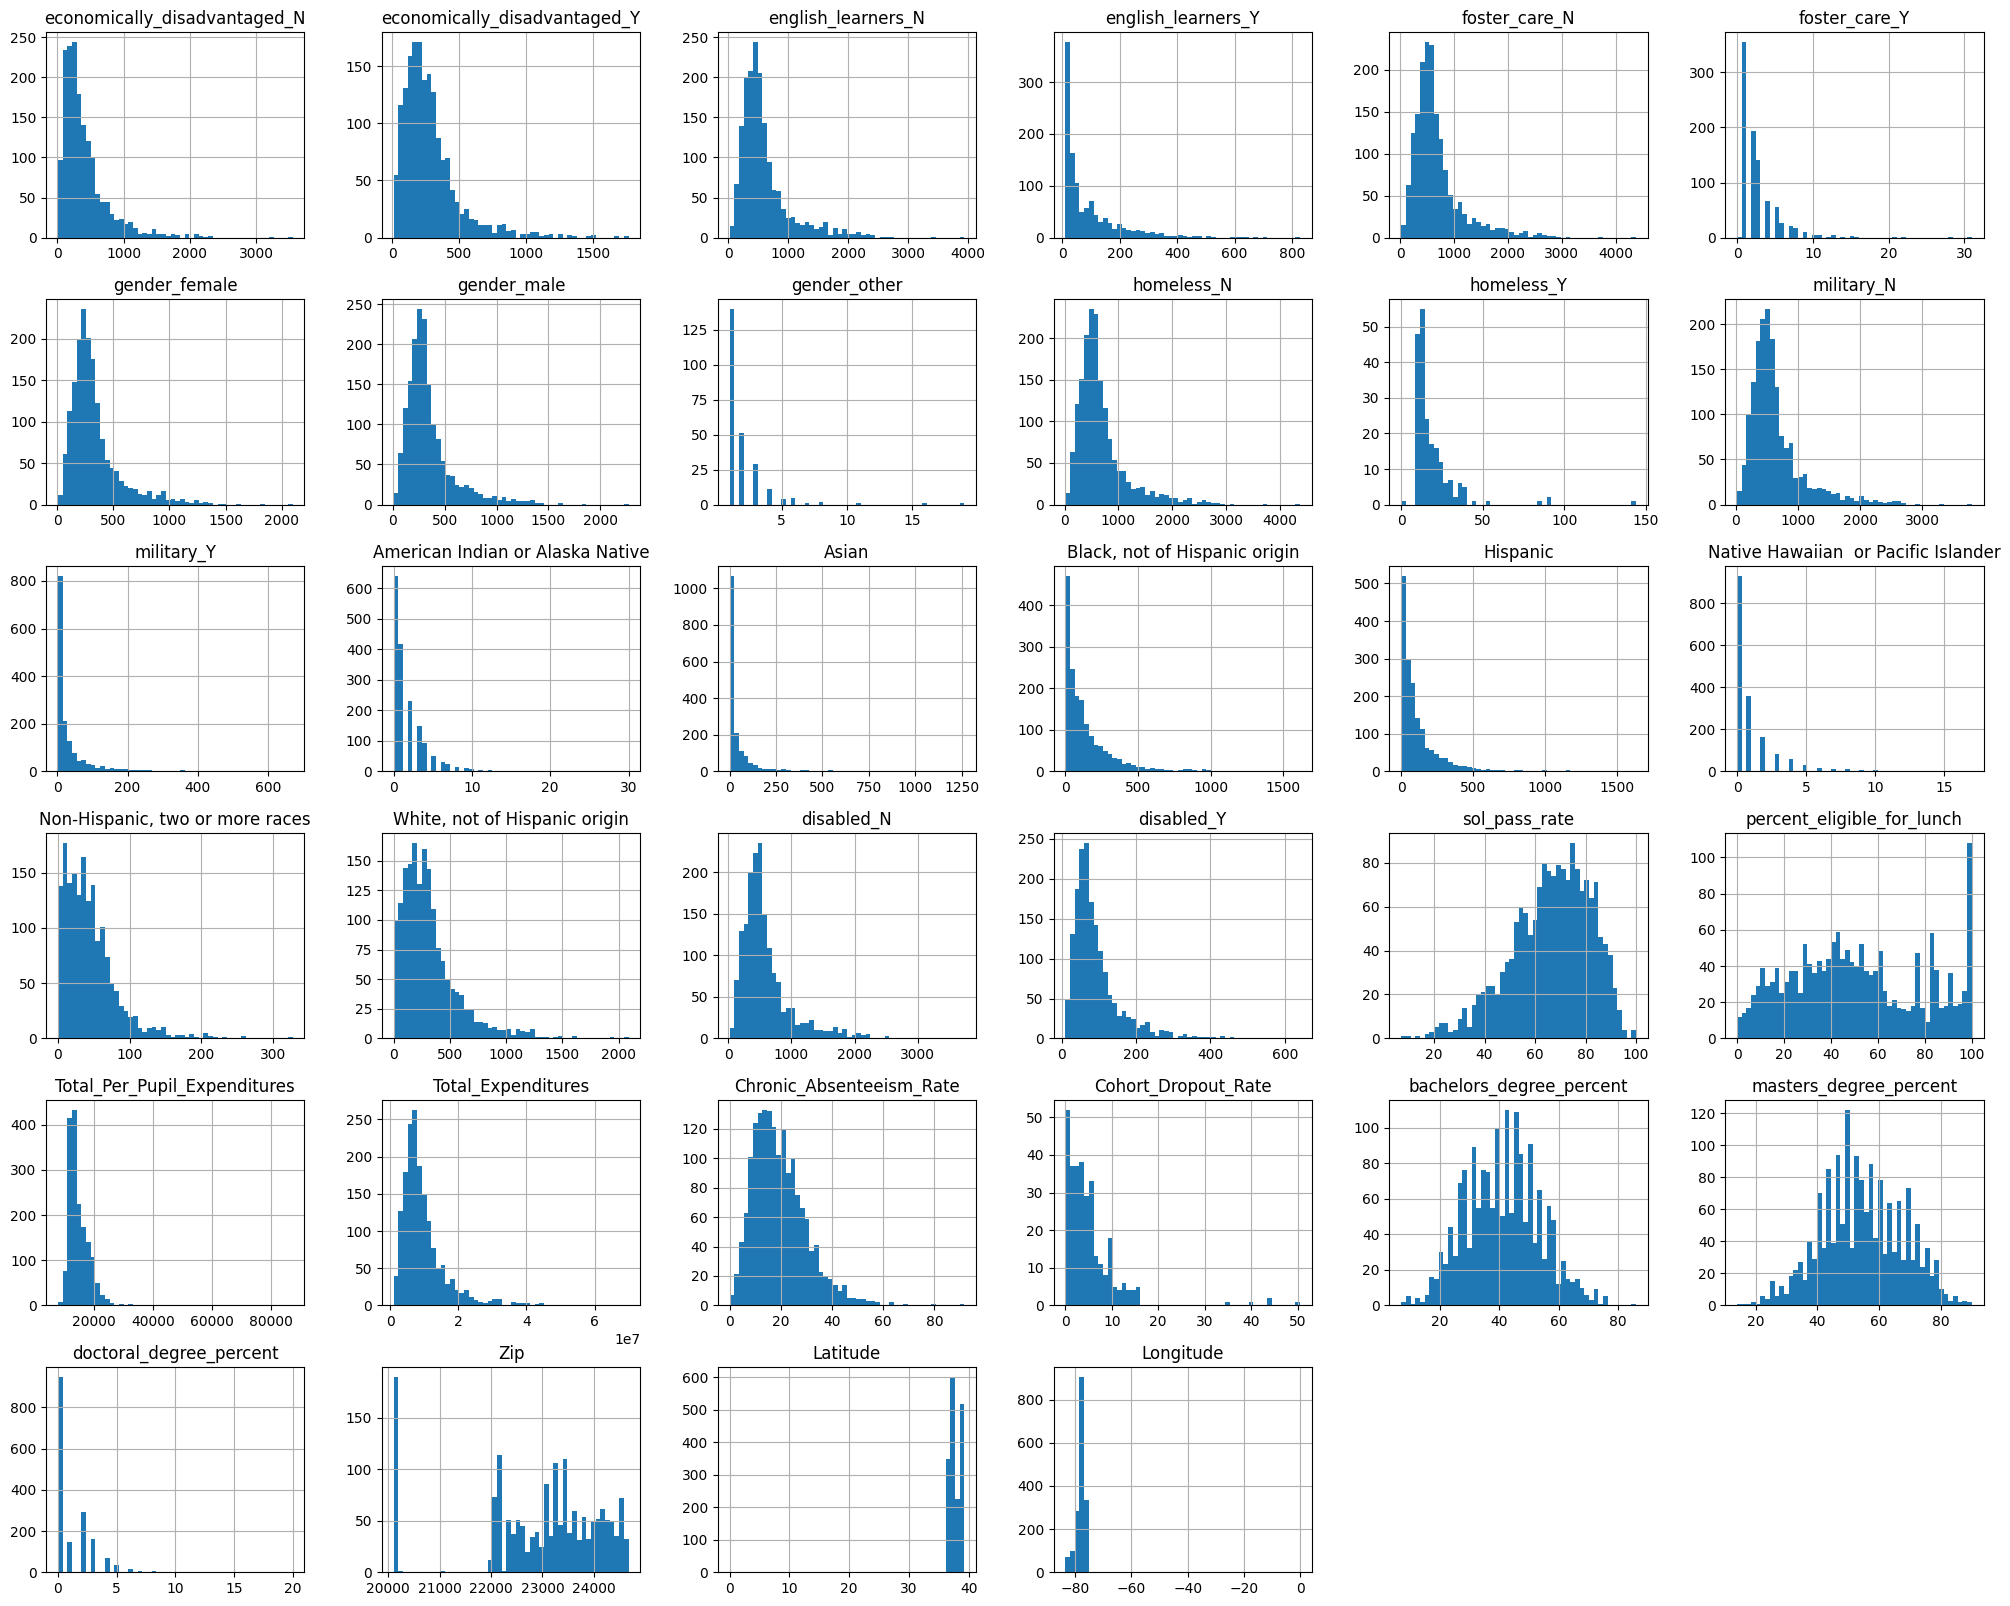

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
master.hist(bins=50, figsize=(25,20))
plt.show()

## Feature Engineering

In [ ]:
# Features to create
#   school_size
#   percent_economically_disadvantaged
#   percent_english_learners
#   percent_foster_care
#   percent_homeless
#   percent_military
#   percent_disabled
#   Percent + all races
import math

def add_percent(index, row, feature_name):
  count_Y = row.get(feature_name + '_Y', 0)
  if math.isnan(count_Y):
    count_Y = 0
  count_N = row.get(feature_name + '_N', 0)
  if math.isnan(count_N):
    count_Y = 0

  if (count_Y + count_N) == 0:
    percent_value = 0
  else:
    percent_value = count_Y / (count_Y + count_N)

  master.at[index, 'percent_' + feature_name] = percent_value

def add_percent_for_races(index, row):
  race_categories = ['American Indian or Alaska Native', 'Asian',
                     'Black, not of Hispanic origin', 'Hispanic',
                     'Native Hawaiian  or Pacific Islander',
                     'Non-Hispanic, two or more races', 'White, not of Hispanic origin']

  sum = 0
  for category in race_categories:
    sum += row.get(category, 0)

  for category in race_categories:
    if sum != 0:
      percent_value = row.get(category, 0) / sum
    else:
      percent_value = 0
    master.at[index, category] = percent_value


for index, row in master.iterrows():
    add_percent(index, row, 'economically_disadvantaged')
    add_percent(index, row, 'english_learners')
    add_percent(index, row, 'foster_care')
    add_percent(index, row, 'homeless')
    add_percent(index, row, 'military')
    add_percent(index, row, 'disabled')

    add_percent_for_races(index, row)

master_without_YN = master.drop(['economically_disadvantaged_Y', 'economically_disadvantaged_N',
                                 'english_learners_Y', 'english_learners_N', 'english_learners_Y',
                                 'english_learners_N', 'foster_care_Y', 'foster_care_N', 'homeless_Y',
                                 'homeless_N', 'military_Y', 'military_N', 'disabled_Y', 'disabled_N'], axis=1)

master_without_YN.head(10)
master = master_without_YN

## Data Cleaning and Preparation

In [ ]:
corr_matrix = master.corr(numeric_only=True)
print(corr_matrix["sol_pass_rate"].sort_values(ascending=False))

sol_pass_rate                           1.000000
White, not of Hispanic origin           0.540708
Asian                                   0.327551
percent_military                        0.202432
masters_degree_percent                  0.200943
Non-Hispanic, two or more races         0.200499
gender_male                             0.157290
gender_female                           0.156791
Total_Expenditures                      0.112948
gender_other                            0.075406
Native Hawaiian  or Pacific Islander    0.035065
Latitude                                0.032078
Longitude                              -0.043054
percent_foster_care                    -0.045842
American Indian or Alaska Native       -0.048843
doctoral_degree_percent                -0.067618
percent_disabled                       -0.085331
Zip                                    -0.107457
percent_homeless                       -0.129390
bachelors_degree_percent               -0.131850
Total_Per_Pupil_Expe

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

master = master.drop(['Sch_Div','Sch_Type','School','Division'], axis=1, errors='ignore') # We don't care about 'Sch_Div' as it is essentially an ID
train_set, test_set = train_test_split(master, test_size=0.2, random_state=42) # Split the data into train set (80%) and test set (20%)

vaps_train = train_set.drop("sol_pass_rate",axis=1)
vaps_test = test_set.drop("sol_pass_rate",axis=1)

num_attribs = list(vaps_train.select_dtypes(include=[np.number]))
cat_attribs = list(vaps_train.select_dtypes(exclude=[np.number]))


# The only numerical data that is missing from the dataset is when a value should be set to 0
# For example, if homeless_Y is NaN, then it's value should be 0
# Therefore, use an imputer that simply replaces NaN values with 0
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
        ('std_scaler', StandardScaler()),
    ])

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])


# The training and testing sets below will be used for Regression
X_train = full_pipeline.fit_transform(vaps_train)
y_train = train_set["sol_pass_rate"].copy()
X_test = full_pipeline.transform(vaps_test)
y_test = test_set["sol_pass_rate"].copy()

column_names = full_pipeline.named_transformers_['num']['std_scaler'].get_feature_names_out(num_attribs)

# The data below will be used with Clustering
data_to_cluster = full_pipeline.fit_transform(master)
data_to_cluster_df = master

## Model Selection

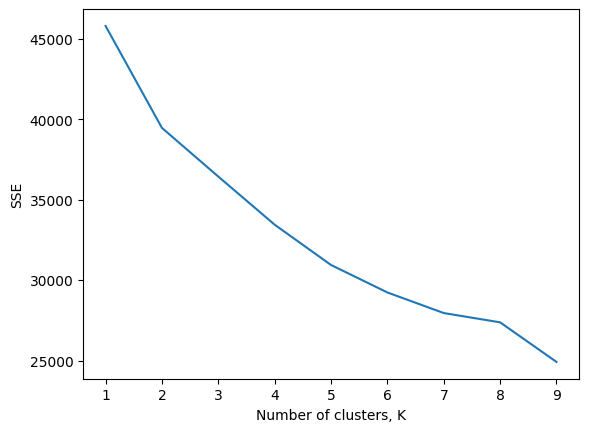

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Determining optimal number k clusters for K-means

# elbow method
sses = {}
for k in range(1,10):
  kmeans = KMeans(n_clusters=k, n_init='auto').fit(data_to_cluster)
  sses[k] = kmeans.inertia_
plt.figure()
plt.plot(list(sses.keys()), list(sses.values()))
plt.xlabel("Number of clusters, K")
plt.ylabel("SSE")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.16873651306007517
For n_clusters = 3 The average silhouette_score is : 0.1626150680253666
For n_clusters = 4 The average silhouette_score is : 0.14438662661660762
For n_clusters = 5 The average silhouette_score is : 0.13549920975708526
For n_clusters = 6 The average silhouette_score is : 0.12504908787507346
For n_clusters = 7 The average silhouette_score is : 0.13924972988766446
For n_clusters = 8 The average silhouette_score is : 0.12791135226736625
For n_clusters = 9 The average silhouette_score is : 0.14266372353388856


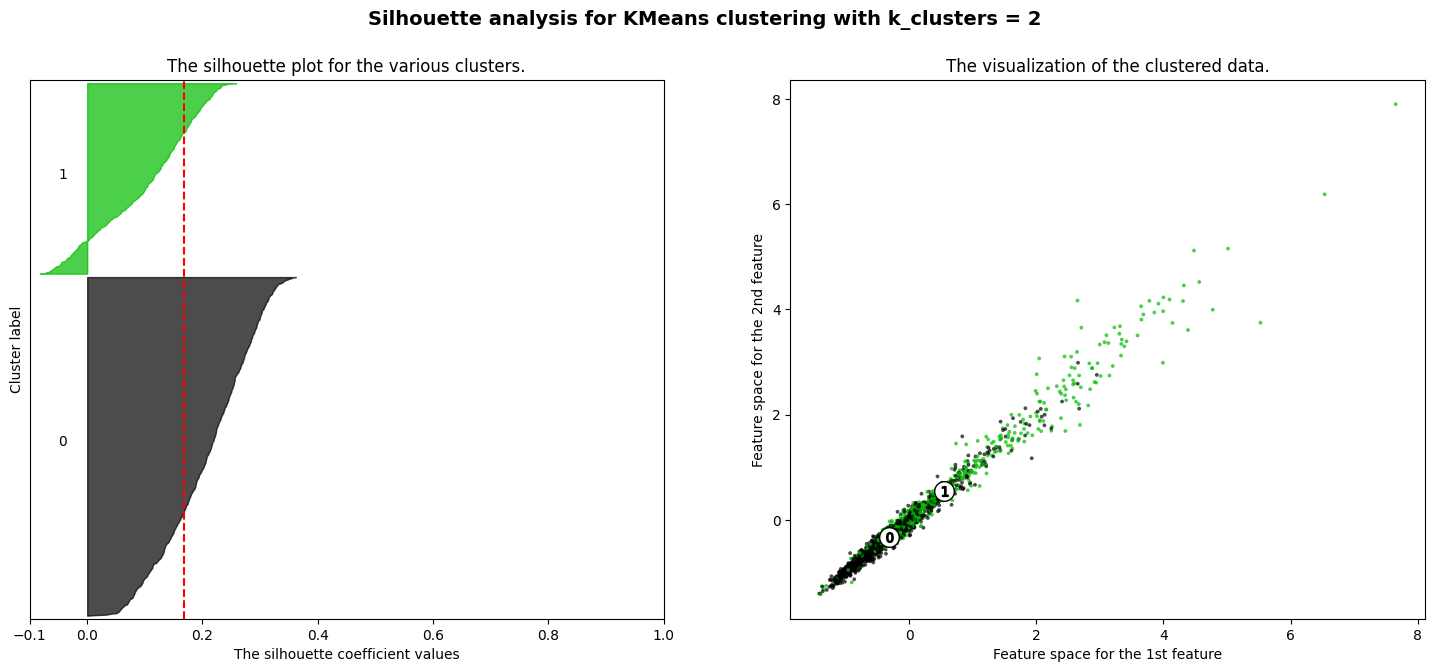

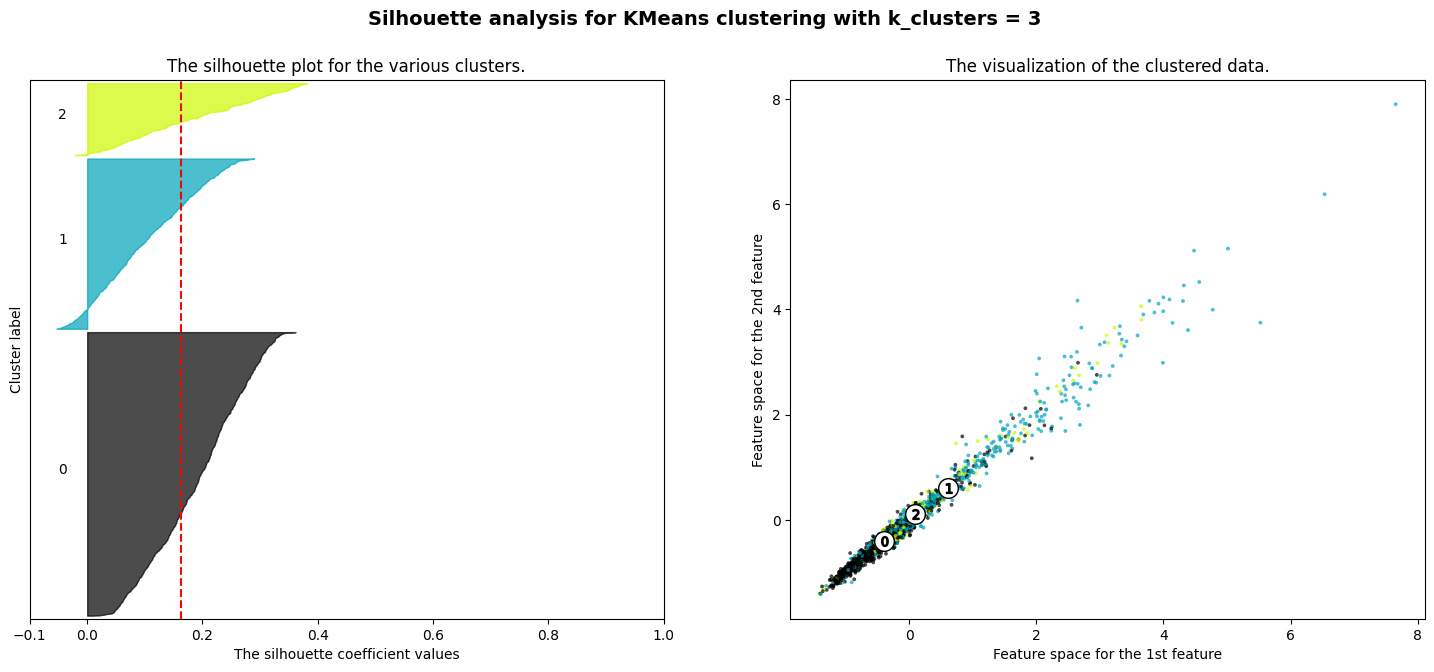

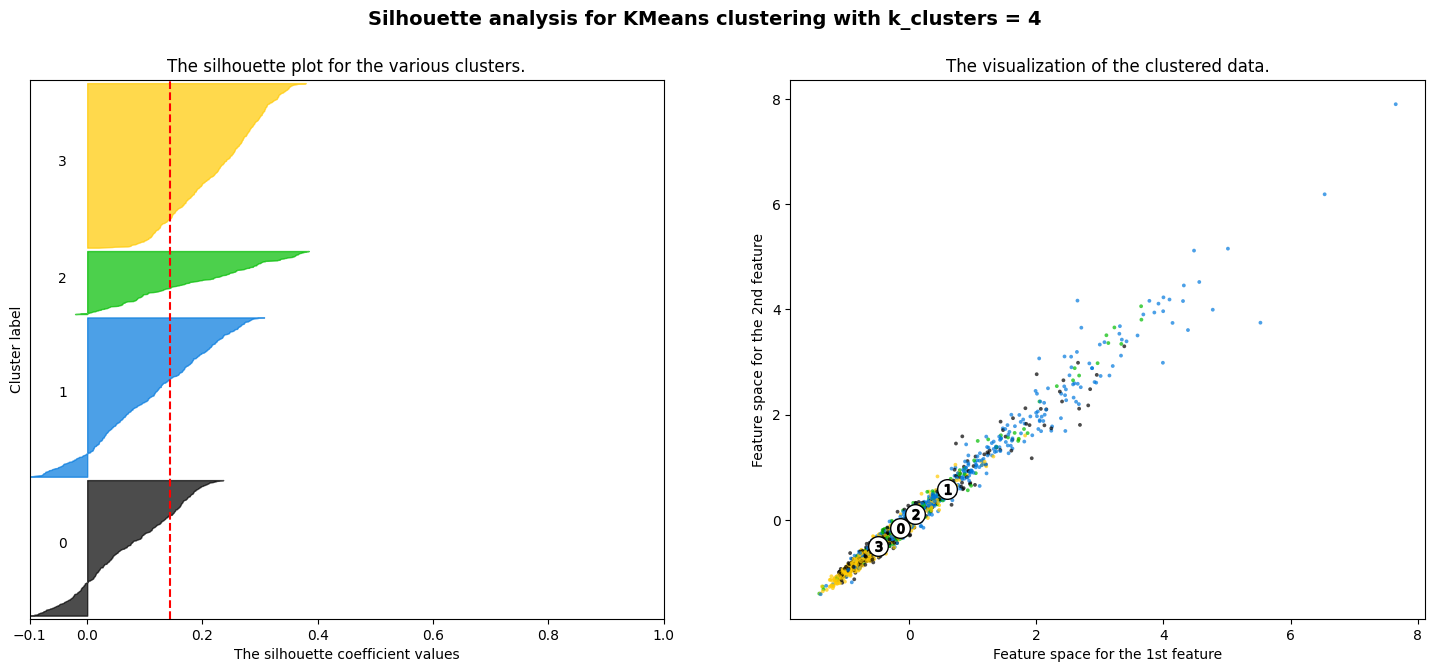

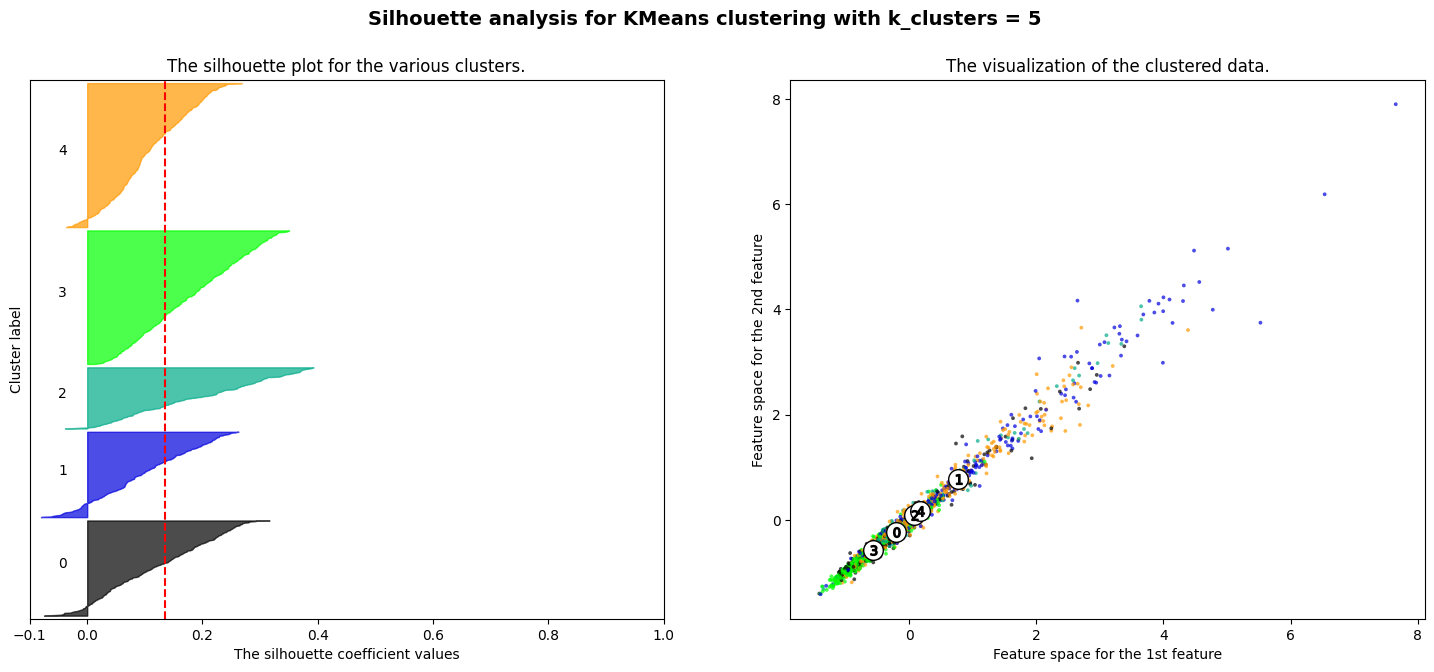

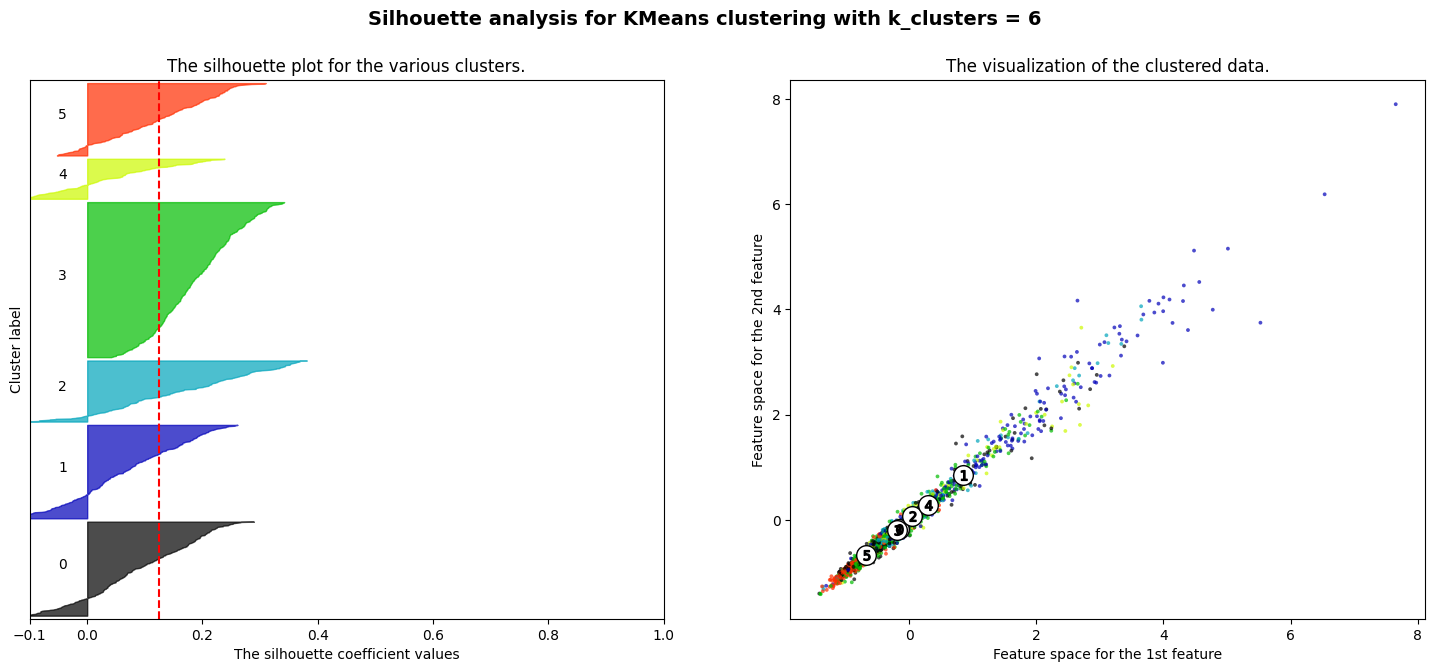

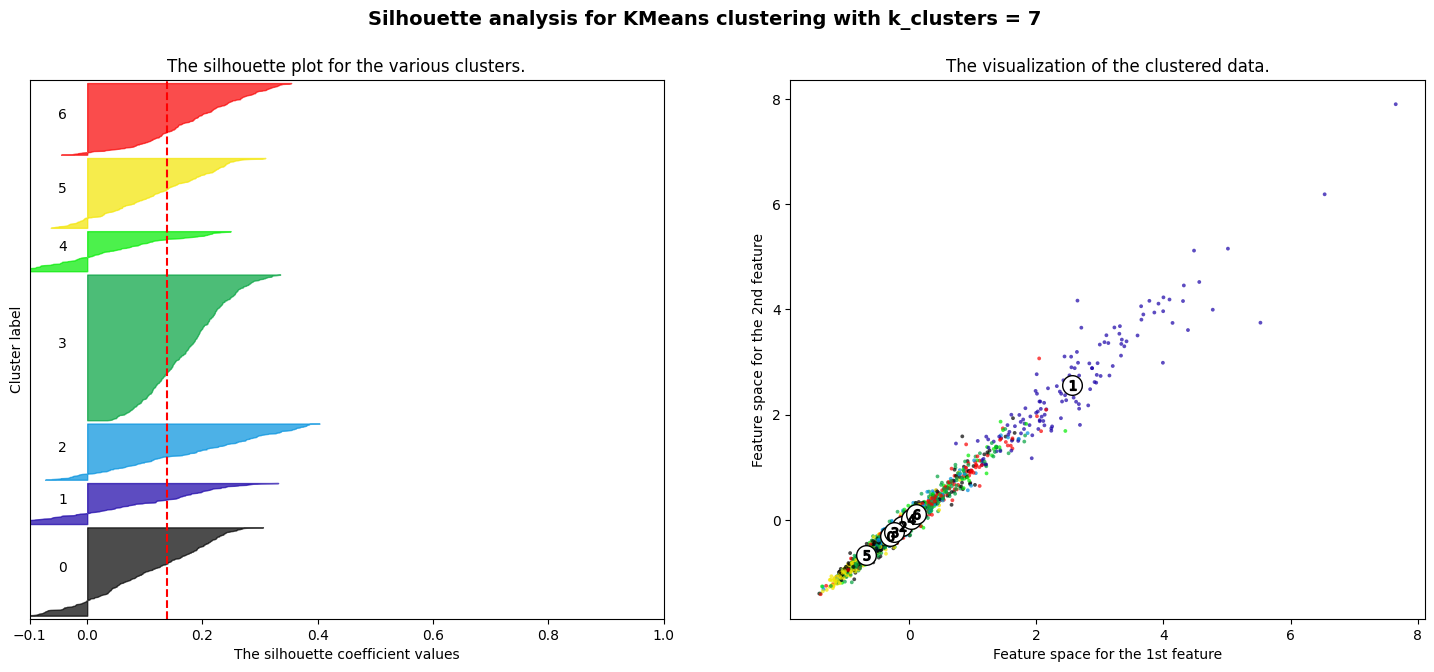

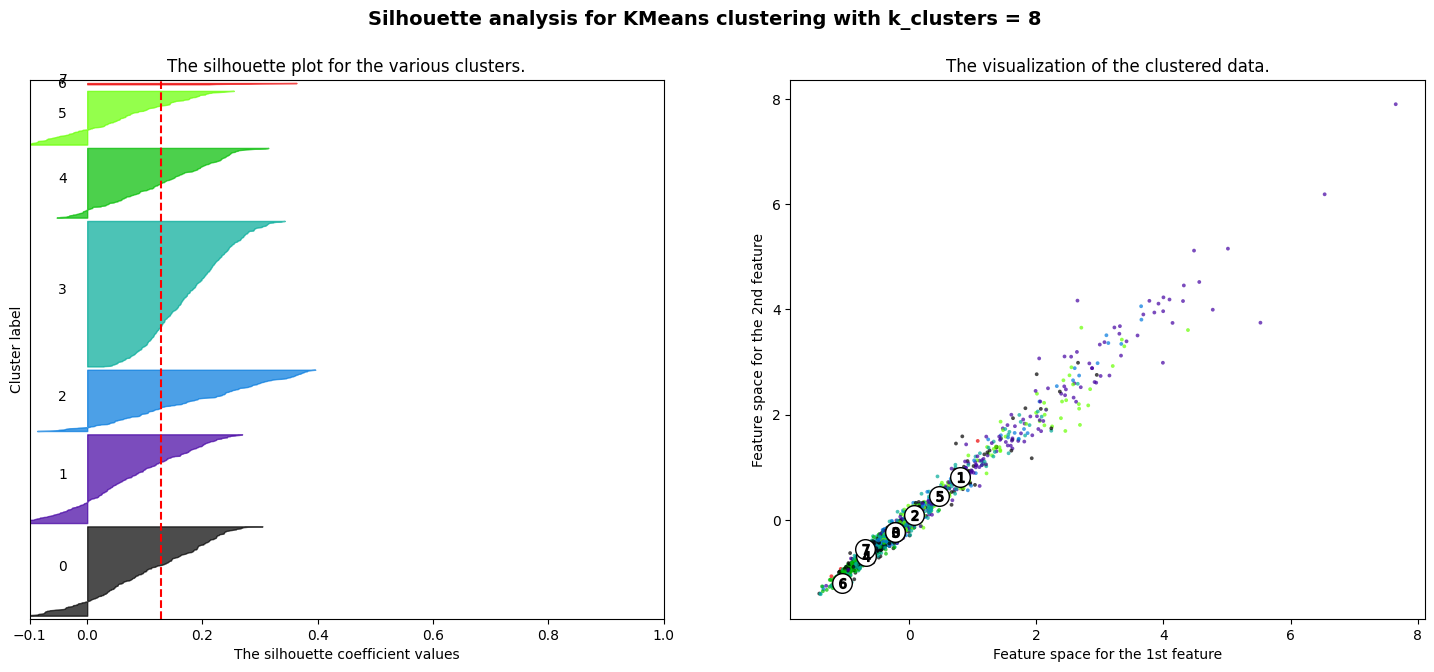

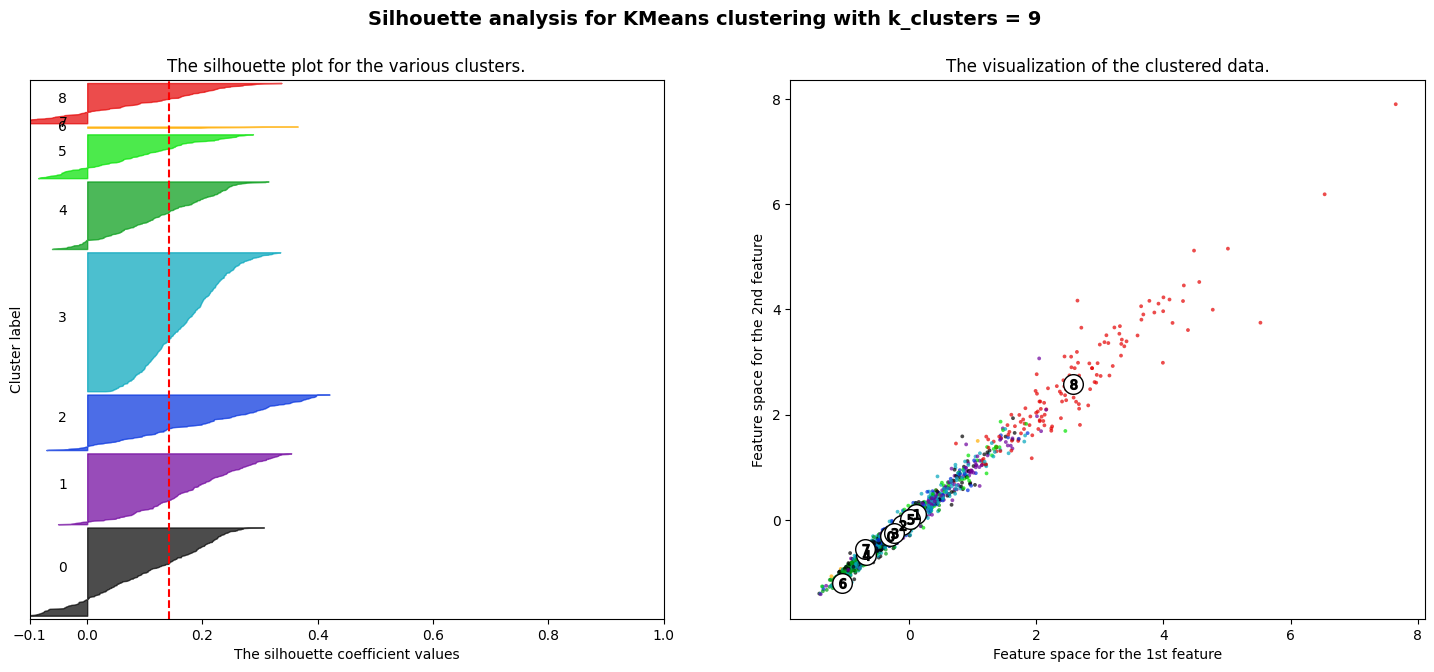

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score

# silhouette scoring code sourced from: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

for n_clusters in range(2,10):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_to_cluster) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(data_to_cluster)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_to_cluster, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_to_cluster, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        data_to_cluster[:, 0], data_to_cluster[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering with k_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [ ]:
kmeans = KMeans(n_clusters=5, n_init='auto',).fit_predict(data_to_cluster)
cluster_assignments = kmeans.labels_
centroids = kmeans.cluster_centers_

# Calculate feature importance based on distance to centroids
feature_importance = np.zeros(data_to_cluster.shape[1])

for cluster_idx in range(len(centroids)):
    cluster_mask = (cluster_assignments == cluster_idx)
    cluster_center = centroids[cluster_idx]

    # Calculate the distance of each point in the cluster to the cluster center
    distances = np.linalg.norm(data_to_cluster[cluster_mask] - cluster_center, axis=1)

    # Accumulate feature importance based on distances
    feature_importance += np.sum(distances[:, np.newaxis] * data_to_cluster[cluster_mask], axis=0)

# Normalize feature importance
feature_importance /= np.sum(feature_importance)

# Display the normalized feature importance
print("Normalized Feature Importance:")
print(sorted(zip(master.columns, feature_importance), key=lambda x: x[0]))

Normalized Feature Importance:
[('American Indian or Alaska Native', 0.08815114198670469), ('Asian', 0.047697394125930936), ('Black, not of Hispanic origin', 0.02085360040059876), ('Chronic_Absenteeism_Rate', 0.11336134462083712), ('Cohort_Dropout_Rate', -0.035749482874388526), ('Hispanic', 0.05512208174779804), ('Latitude', 0.005640724231805415), ('Longitude', 0.028451683240330414), ('Native Hawaiian  or Pacific Islander', 0.0612186032022871), ('Non-Hispanic, two or more races', -0.030551624322861678), ('Total_Expenditures', 0.07670147012528761), ('Total_Per_Pupil_Expenditures', 0.0393800515113981), ('White, not of Hispanic origin', -0.08509714945150183), ('Zip', 0.019282021221988757), ('bachelors_degree_percent', 0.011282434607123455), ('doctoral_degree_percent', -0.031674340417964075), ('gender_female', 0.02235297626036117), ('gender_male', 0.025108104237491474), ('gender_other', 0.08794515476459785), ('masters_degree_percent', 0.09338390275355055), ('percent_economically_disadvanta

In [ ]:
kmeans = KMeans(n_clusters=2, n_init='auto',).fit_predict(data_to_cluster)


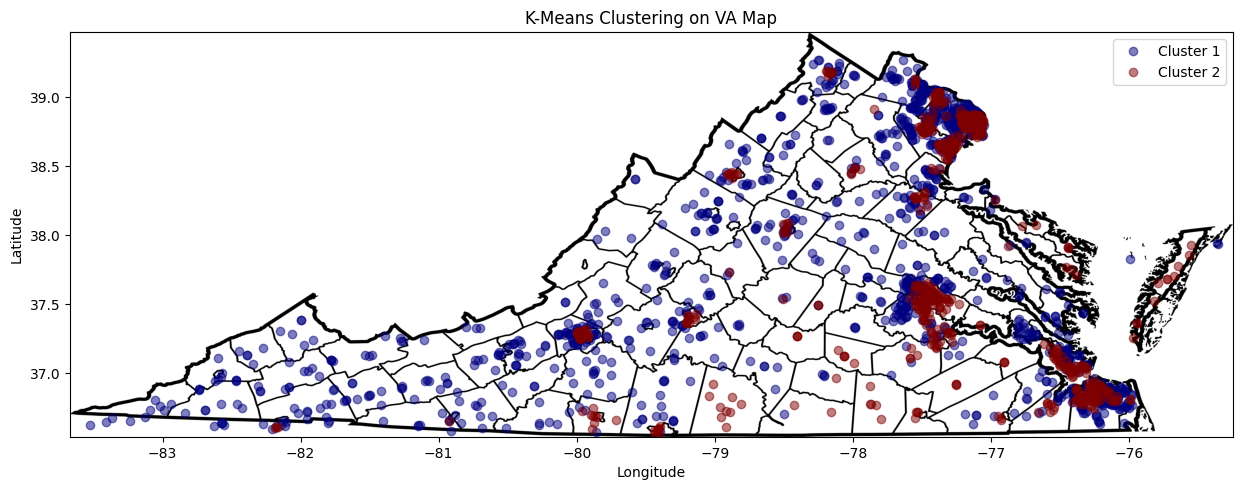

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

VA_LONG= (-83.67,-75.25)
VA_LAT = (36.54,39.47)

centroids = np.unique(kmeans)
map_image = mpimg.imread('map_va_white.png')
colors = plt.cm.jet(np.linspace(0,1,centroids.shape[0]))
fig = plt.subplots(figsize=(15,12))
plt.imshow(map_image, extent=[VA_LONG[0], VA_LONG[1], VA_LAT[0], VA_LAT[1]])

for i in range(centroids.shape[0]):
  cluster_data = data_to_cluster_df.loc[kmeans == centroids[i]]
  cluster_long = cluster_data["Longitude"]
  cluster_lat = cluster_data["Latitude"]
  plt.plot(cluster_long,cluster_lat,color=colors[i],label=f'Cluster {i + 1}',linestyle='none',marker='o',alpha=0.5)
  # plt.scatter(data_to_cluster_df[kmeans_clusters == c]["Longitude"], data_to_cluster_df[kmeans_clusters == c]["Latitude"])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('K-Means Clustering on VA Map')
plt.legend()
plt.xlim(*VA_LONG)  # Adjust these limits to match your extent
plt.ylim(*VA_LAT)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

tree_reg = DecisionTreeRegressor(random_state=3)
tree_reg.fit(X_train, y_train)

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(X_train, y_train)

sv_reg = SVR()
sv_reg.fit(X_train, y_train)

mlp_reg = MLPRegressor(hidden_layer_sizes=(50,),solver='sgd',max_iter=1000)
mlp_reg.fit(X_train,y_train)

def display_scores(scores):
    print("Scores:", scores)
    print("Mean RMSE:", scores.mean())
    print("Standard deviation:", scores.std())

print("Linear")
display_scores(np.sqrt(-cross_val_score(lin_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))

print("\nRidge")
display_scores(np.sqrt(-cross_val_score(ridge_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))

print("\nTree")
display_scores(np.sqrt(-cross_val_score(tree_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))
print("\nForest")
display_scores(np.sqrt(-cross_val_score(forest_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))

print("\nSVR")
display_scores(np.sqrt(-cross_val_score(sv_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))
print("\nMLP")
display_scores(np.sqrt(-cross_val_score(mlp_reg, X_train, y_train, scoring="neg_mean_squared_error", cv=5)))


print("\nFeature Importances of All Models:")
print("Linear:", lin_reg.coef_)
print("Ridge:", ridge_reg.coef_)
print("Tree:", tree_reg.feature_importances_)
print("Forest:", forest_reg.feature_importances_)


Linear
Scores: [ 9.32764212  9.52897593  8.90569581  8.53917476 14.64778415]
Mean: 10.18985455529468
Standard deviation: 2.2550882286118847

Ridge
Scores: [ 9.32693732  9.41183479  8.90452137  8.53979881 14.51914306]
Mean: 10.140447070411676
Standard deviation: 2.2115713723819668

Tree
Scores: [11.5343935  11.76477951 11.99285415 11.28194803 11.56241282]
Mean: 11.627277601302236
Standard deviation: 0.23859605832245873

Forest
Scores: [8.7581282  8.16017391 8.19504855 8.27608777 8.14860406]
Mean: 8.307608498517492
Standard deviation: 0.2296304281281584

SVR
Scores: [10.01355125  9.95422279  9.70521413 10.8488771   9.20765884]
Mean: 9.945904821668769
Standard deviation: 0.5334685159511737

MLP
Scores: [ 9.66913662  9.07613175  9.48872935  9.71527821 39.04671052]
Mean: 15.399197291396694
Standard deviation: 11.82590548104979

Feature Importance:
Linear: [ 0.56915917 -2.52670076 -0.06469568 -0.64675028  3.85948485 -1.35541982
  0.37081692 -0.30786207  0.57899739  4.55499569 -4.1177179  -1.

## Model Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'bootstrap': [True, False], 'n_estimators': [5, 10, 20, 40, 60, 80, 100, 120, 140, 160, 180], 'max_features': [2, 4, 6, 8, 10]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=6, n_estimators=140,
                      random_state=42)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(100, 180),
    'max_features': randint(3, 9),
    'bootstrap': [True, False]
}

best_forest = grid_search.best_estimator_

randomized_search = RandomizedSearchCV(
    best_forest, param_distributions=param_dist, n_iter=100,
    cv=5, scoring='neg_mean_squared_error', random_state=42,
    return_train_score=True
)

randomized_search.fit(X_train, y_train)

print("Best Estimator:", randomized_search.best_estimator_)
print("Best Hyperparameters:", randomized_search.best_params_)

Best Estimator: RandomForestRegressor(bootstrap=False, max_features=7, n_estimators=140,
                      random_state=42)
Best Hyperparameters: {'bootstrap': False, 'max_features': 7, 'n_estimators': 140}


In [ ]:
best_forest = randomized_search.best_estimator_

print("Best Score Random:", np.sqrt(-randomized_search.best_score_))
print("Best score grid:",np.sqrt(-grid_search.best_score_))

y_pred = best_forest.predict(X_test)
print("Test RMSE",np.sqrt(np.mean(np.square(y_pred-y_test))))
importances = sorted(zip(best_forest.feature_importances_, column_names), reverse=True)
print("\nSorted Feature Importances after model tuning:")
print(len(importances))

for importance, attribute in importances:
    print(f"{attribute}: {importance}")

Best Score Random: 8.11557132113083
Best score grid: 8.143000841930007
Test RMSE 8.688139647179094

Sorted Feature Importances after model tuning:
27
percent_eligible_for_lunch: 0.18804590506445878
White, not of Hispanic origin: 0.17392353978288394
percent_economically_disadvantaged: 0.12497097018205647
Black, not of Hispanic origin: 0.07425637029554023
Chronic_Absenteeism_Rate: 0.07024256255637396
Zip: 0.03500513520786226
Hispanic: 0.033358992406043765
Latitude: 0.02964956123733064
Asian: 0.02870514260371573
percent_english_learners: 0.025727313152710533
Longitude: 0.02570557444862349
Non-Hispanic, two or more races: 0.023934562398609263
Total_Per_Pupil_Expenditures: 0.023148475570706633
percent_military: 0.022050028913409445
percent_disabled: 0.016783255733200823
gender_male: 0.014128356522747961
Total_Expenditures: 0.014018647528167682
gender_female: 0.012490656761161062
American Indian or Alaska Native: 0.010895426820480432
masters_degree_percent: 0.010264962096843123
bachelors_deg